# Patient generator

In [ ]:
import random
import numpy as np

class Patient:
    def __init__(self, template):
        self.mortality_score = np.clip(template['mortality_score'] + np.random.normal(0, template.get('mortality_std', 0)), 0.05, 0.95) # if it reach 1, patient will die in the next day
        self.category = np.random.choice(template['category'])
        self.waiting_day = 0 # tracking of waiting day
        self.admission_priority = 0 # tracking the admission priority under different strategy
        self.discharge_score = 0 #if it reach 1, patient will be discharged in the next day
        self.hospitalization_day = 0 # tracking of waiting day

def generate_patients(templates, weights, num_patients):
    patients = []
    for _ in range(num_patients):
        random_template = random.choices(templates, weights, k=1)[0]
        patient = Patient(random_template)
        patients.append(patient)
    return patients

In [26]:
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

templates = [template_disease, template_survey]
weights=[0.8, 0.2]

patients = []
patients = generate_patients(templates, weights, 5)

for i, patient in enumerate(patients, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Patient 1:
  Mortality Score: 0.20594050946807085
  Waiting Time: 0
  Category: 0

Patient 2:
  Mortality Score: 0.05
  Waiting Time: 0
  Category: 0

Patient 3:
  Mortality Score: 0.08521885878485161
  Waiting Time: 0
  Category: 0

Patient 4:
  Mortality Score: 0.19126139538220596
  Waiting Time: 0
  Category: 0

Patient 5:
  Mortality Score: 0.27846219935188976
  Waiting Time: 0
  Category: 0



# Admission waiting
- With each waiting day, the mortality rate increases by 10% on average and is drawn from a normal distribution with a standard deviation of 5%.
- With this formula, mortality > 50% will only increase during waiting

In [ ]:
# Each day of waiting
def waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients):
    '''
    mortality_inflation: rate of
    templates: list of patient template for new patient generation
    weights: possibility of each patient template being selected
    num_patients: number of new patient added per day
    '''
    # modify the old patients
    admission_waiting_list_copy = admission_waiting_list.copy()
    for patient in admission_waiting_list_copy:
        if patient.mortality_score >= 1:
            waiting_to_dead_list.append(patient)
            admission_waiting_list.remove(patient)
            continue
        patient.waiting_day += 1
        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_inflation, 0.05), 0, 1)
    # add new patients
    new_patients = generate_patients(templates, weights, num_patients)
    admission_waiting_list.extend(new_patients)
    return admission_waiting_list, waiting_to_dead_list

In [27]:
# Initialization
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

templates = [template_disease, template_survey]
weights=[0.8, 0.2]
num_patients = 5
mortality_inflation = 1.1

admission_waiting_list = generate_patients(templates, weights, num_patients)
waiting_to_dead_list = []

# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.22791587385606948
  Waiting Time: 0
  Category: 0

Patient 2:
  Mortality Score: 0.2097019638802768
  Waiting Time: 0
  Category: 0

Patient 3:
  Mortality Score: 0.3728684546972344
  Waiting Time: 0
  Category: 0

Patient 4:
  Mortality Score: 0.3655998668651239
  Waiting Time: 0
  Category: 0

Patient 5:
  Mortality Score: 0.1736948504832179
  Waiting Time: 0
  Category: 4

Waiting to Dead List:


In [37]:
# Each day of waiting
admission_waiting_list, waiting_to_dead_list = waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients)

# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.3620824317580623
  Waiting Time: 10
  Category: 0

Patient 2:
  Mortality Score: 0.28040672986024207
  Waiting Time: 10
  Category: 0

Patient 3:
  Mortality Score: 0.29656691679912756
  Waiting Time: 10
  Category: 4

Patient 4:
  Mortality Score: 1.0
  Waiting Time: 9
  Category: 0

Patient 5:
  Mortality Score: 0.8108481476874845
  Waiting Time: 9
  Category: 0

Patient 6:
  Mortality Score: 0.5377700011086683
  Waiting Time: 9
  Category: 0

Patient 7:
  Mortality Score: 0.6214215616924158
  Waiting Time: 9
  Category: 0

Patient 8:
  Mortality Score: 0.6801412845668013
  Waiting Time: 9
  Category: 0

Patient 9:
  Mortality Score: 0.8574566213528377
  Waiting Time: 8
  Category: 0

Patient 10:
  Mortality Score: 0.3947401223291273
  Waiting Time: 8
  Category: 0

Patient 11:
  Mortality Score: 0.14364893652754215
  Waiting Time: 8
  Category: 0

Patient 12:
  Mortality Score: 0.04993453140147569
  Waiting Time: 8
  Category: 

# Hospital

Ideas to add
- variable bed number of each team.

In [ ]:
class Hospital:
    def __init__(self, bed_dict, bed_count=30, team_count=3):
        self.bed_dict = bed_dict # key is 0-29 (bed number), value is a tuple (medical team, patient)
        self.bed_count = bed_count # max length of bed_list
        self.team_count = team_count
        self.team_patient = np.zeros(team_count)
        self.team_category = np.zeros((team_count, 5)) # array storing number of day since the last encounter for a specific category (column) of patient for each team (row)
        self.available_bed = list(range(bed_count))

In [ ]:
hospital = Hospital(bed_dict={}, bed_count=30, team_count=3)

# Calling admission

In [ ]:
def calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold=0.9, preference_weight=[1,1,1]):
    '''
    preference_weight: relative weight of mortality, patient waiting time, educational value (it will be normalize spontaneously)
    '''
    ##### queue the admission waiting list
    # sort the emergent patient with high mortality to the front
    if len(admission_waiting_list) == 0:
        return hospital, admission_waiting_list

    admission_waiting_list.sort(key=lambda patient: patient.mortality_score, reverse=True)
    first_nonemergent_patient = next((i for i, patient in enumerate(admission_waiting_list) if patient.mortality_score <= emergent_mortality_threshold), len(admission_waiting_list))

    # Normalize preference_weight
    preference_weight = np.array(preference_weight)/sum(preference_weight)
    max_waiting_day = max(patient.waiting_day for patient in admission_waiting_list[first_nonemergent_patient:])

    # Calculate the education preference
    team_category_array = hospital.team_category.copy()
    available_team = []
    # If a medical team is full, we don't consider their preference
    for team in range(hospital.team_count):
        if hospital.team_patient[team]>=10:
            team_category_array[team] = np.zeros(5)
        else:
            available_team.append(team) # the team that can handel newly admitted patients

    if np.any(team_category_array != 0):
        team_category_array = np.sum(team_category_array, axis=0)/np.sum(team_category_array) #column sum and noramlize for each patient category
    else:
        team_category_array = np.zeros(5)

    # Sort nonemergent patient based on preference
    for patient in admission_waiting_list[first_nonemergent_patient:]:
        preference_data = np.array([patient.mortality_score, patient.waiting_day/(max_waiting_day+1), team_category_array[patient.category]])
        patient.admission_priority = np.dot(preference_weight, preference_data)

    admission_waiting_list[first_nonemergent_patient:].sort(key=lambda patient: patient.admission_priority, reverse=True)

    ##### calling patient for empty bed
    hospital_available_bed_copy = hospital.available_bed.copy()
    for bed_no in hospital_available_bed_copy:
        hospital.available_bed.remove(bed_no)
        patient = admission_waiting_list.pop(0)
        selected_team = available_team[np.argmax(hospital.team_category[available_team,patient.category])]
        hospital.bed_dict[bed_no] = (selected_team, patient)
        hospital.team_patient[selected_team] +=1 #The team had one more patient
        if hospital.team_patient[selected_team] >=10:
            available_team.remove(selected_team) # The team is no more available
        if len(admission_waiting_list) == 0:
            break
    return hospital, admission_waiting_list

In [ ]:
preference_weight=[1,1,1]
emergent_mortality_threshold=0.9

hospital, admission_waiting_list = calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold, preference_weight)

print(hospital.bed_dict)
print(hospital.team_patient)
print(hospital.team_category)
print(hospital.available_bed)

{0: (0, <__main__.Patient object at 0x7957197639a0>), 1: (0, <__main__.Patient object at 0x795719763430>), 2: (0, <__main__.Patient object at 0x7957197634c0>), 3: (0, <__main__.Patient object at 0x795719762a70>), 4: (0, <__main__.Patient object at 0x7957197634f0>), 5: (0, <__main__.Patient object at 0x7957197619c0>), 6: (0, <__main__.Patient object at 0x795719763af0>), 7: (0, <__main__.Patient object at 0x795719763df0>), 8: (0, <__main__.Patient object at 0x795719762f80>), 9: (0, <__main__.Patient object at 0x795719763940>)}
[10.  0.  0.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Hospital day

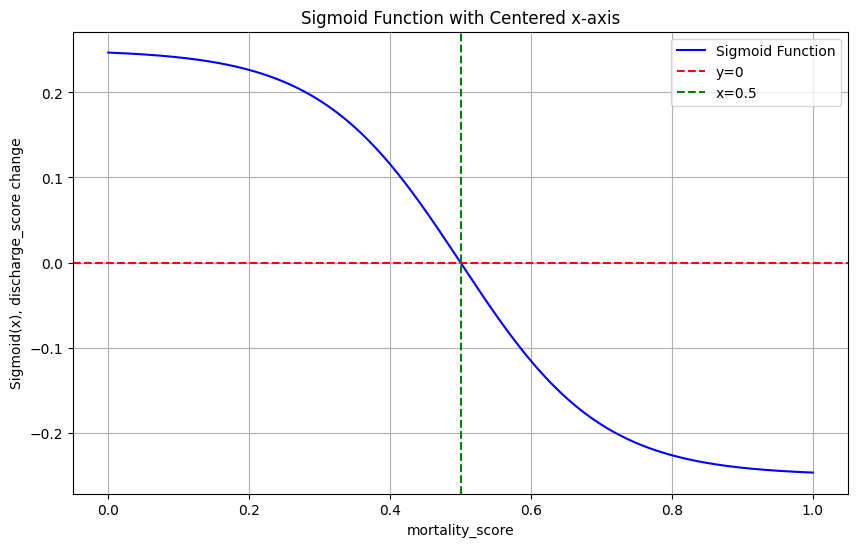

In [ ]:
# use mortality_score to calulate the change of discharge_score
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return - 0.5 / (1 + np.exp((-x+0.5)*10)) + 0.25

x = np.linspace(0, 1, 400)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.axvline(0.5, color='green', linestyle='--', label='x=0.5')
plt.xlabel('mortality_score')
plt.ylabel('Sigmoid(x), discharge_score change')
plt.title('Sigmoid Function with Centered x-axis')
plt.legend()
plt.grid(True)
plt.show()

def hospital_day(hospital, mortality_reduction):
    # modify team_category in hospital
    hospital.team_category = hospital.team_category + 1

    # modify mortality_score, discharge_score, hospitalization_day in paitents
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():

        unfamiliarity = hospital.team_category[team_no , patient.category] + 1 # how long the team had no experience taking care of such patient

        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_reduction, 0.1 * unfamiliarity), 0, 1)
        patient.discharge_score = np.clip((patient.discharge_score + sigmoid(patient.mortality_score) - unfamiliarity / 10), 0, 1)
        patient.hospitalization_day += 1

        hospital.team_category[team_no, patient.category] = 0 # become familier after caring for patient
    return hospital


In [58]:
mortality_reduction = 0.8
hospital = hospital_day(hospital, mortality_reduction)

print(hospital.bed_dict)
print(hospital.team_patient)
print(hospital.team_category)
print(hospital.available_bed)

{0: (0, <__main__.Patient object at 0x7957198d7f70>), 1: (0, <__main__.Patient object at 0x7957197b0250>), 2: (0, <__main__.Patient object at 0x7957196db250>), 3: (0, <__main__.Patient object at 0x7957198d7a00>), 4: (0, <__main__.Patient object at 0x7957198d6b30>), 5: (1, <__main__.Patient object at 0x7957198d7790>), 6: (1, <__main__.Patient object at 0x795719762740>), 7: (1, <__main__.Patient object at 0x7957198d7dc0>), 8: (1, <__main__.Patient object at 0x7957198d5b10>), 9: (1, <__main__.Patient object at 0x7957198d7bb0>)}
[5. 5. 0.]
[[0. 6. 0. 6. 6.]
 [0. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6.]]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Hospital discharge

In [ ]:
def hospital_discharge(hospital, discharge_alive_list, discharge_dead_list):
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():
        if patient.mortality_score >= 1:
            dead_patient = hospital.bed_dict.pop(bed_no)
            discharge_dead_list.append(dead_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
        elif patient.discharge_score >= 1:
            discharged_patient = hospital.bed_dict.pop(bed_no)
            discharge_alive_list.append(discharged_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
    return hospital, discharge_alive_list, discharge_dead_list

In [ ]:
discharge_alive_list = []
discharge_dead_list = []

hospital, discharge_alive_list, discharge_dead_list = hospital_discharge(hospital, discharge_alive_list, discharge_dead_list)

# A day in the hospital

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Patient:
    def __init__(self, template):
        self.mortality_score = np.clip(template['mortality_score'] + np.random.normal(0, template.get('mortality_std', 0)), 0.05, 0.95) # if it reach 1, patient will die in the next day
        self.category = np.random.choice(template['category'])
        self.waiting_day = 0 # tracking of waiting day
        self.admission_priority = 0 # tracking the admission priority under different strategy
        self.discharge_score = 0 #if it reach 1, patient will be discharged in the next day
        self.hospitalization_day = 0 # tracking of waiting day

class Hospital:
    def __init__(self, bed_dict, bed_count=30, team_count=3):
        self.bed_dict = bed_dict # key is 0-29 (bed number), value is a tuple (medical team, patient)
        self.bed_count = bed_count # max length of bed_list
        self.team_count = team_count
        self.team_patient = np.zeros(team_count)
        self.team_category = np.zeros((team_count, 5)) # array storing number of day since the last encounter for a specific category (column) of patient for each team (row)
        self.available_bed = list(range(bed_count))

# Each day of waiting
def generate_patients(templates, weights, num_patients):
    patients = []
    for _ in range(num_patients):
        random_template = random.choices(templates, weights, k=1)[0]
        patient = Patient(random_template)
        patients.append(patient)
    return patients

def waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients):
    '''
    mortality_inflation: rate of
    templates: list of patient template for new patient generation
    weights: possibility of each patient template being selected
    num_patients: number of new patient added per day
    '''
    # modify the old patients
    admission_waiting_list_copy = admission_waiting_list.copy()
    for patient in admission_waiting_list_copy:
        if patient.mortality_score >= 1:
            waiting_to_dead_list.append(patient)
            admission_waiting_list.remove(patient)
            continue
        patient.waiting_day += 1
        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_inflation, 0.05), 0, 1)
    # add new patients
    new_patients = generate_patients(templates, weights, num_patients)
    admission_waiting_list.extend(new_patients)
    return admission_waiting_list, waiting_to_dead_list

# Calling admission
def calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold=0.9, preference_weight=[1,1,1]):
    '''
    preference_weight: relative weight of mortality, patient waiting time, educational value (it will be normalize spontaneously)
    '''
    ##### queue the admission waiting list
    # sort the emergent patient with high mortality to the front
    if len(admission_waiting_list) == 0:
        return hospital, admission_waiting_list

    admission_waiting_list.sort(key=lambda patient: patient.mortality_score, reverse=True)
    first_nonemergent_patient = next((i for i, patient in enumerate(admission_waiting_list) if patient.mortality_score <= emergent_mortality_threshold), len(admission_waiting_list))

    # Normalize preference_weight
    preference_weight = np.array(preference_weight)/sum(preference_weight)
    max_waiting_day = max(patient.waiting_day for patient in admission_waiting_list[first_nonemergent_patient:])

    # Calculate the education preference
    team_category_array = hospital.team_category.copy()
    available_team = []
    # If a medical team is full, we don't consider their preference
    for team in range(hospital.team_count):
        if hospital.team_patient[team]>=10:
            team_category_array[team] = np.zeros(5)
        else:
            available_team.append(team) # the team that can handel newly admitted patients

    if np.any(team_category_array != 0):
        team_category_array = np.sum(team_category_array, axis=0)/np.sum(team_category_array) #column sum and noramlize for each patient category
    else:
        team_category_array = np.zeros(5)

    # Sort nonemergent patient based on preference
    for patient in admission_waiting_list[first_nonemergent_patient:]:
        preference_data = np.array([patient.mortality_score, patient.waiting_day/(max_waiting_day+1), team_category_array[patient.category]])
        patient.admission_priority = np.dot(preference_weight, preference_data)

    admission_waiting_list[first_nonemergent_patient:].sort(key=lambda patient: patient.admission_priority, reverse=True)

    ##### calling patient for empty bed
    hospital_available_bed_copy = hospital.available_bed.copy()
    for bed_no in hospital_available_bed_copy:
        hospital.available_bed.remove(bed_no)
        patient = admission_waiting_list.pop(0)
        selected_team = available_team[np.argmax(hospital.team_category[available_team,patient.category])]
        hospital.bed_dict[bed_no] = (selected_team, patient)
        hospital.team_patient[selected_team] +=1 #The team had one more patient
        if hospital.team_patient[selected_team] >=10:
            available_team.remove(selected_team) # The team is no more available
        if len(admission_waiting_list) == 0:
            break
    return hospital, admission_waiting_list

# Each day admitted
def sigmoid(x):
    return - 0.5 / (1 + np.exp((-x+0.5)*10)) + 0.25

def hospital_day(hospital, mortality_reduction):
    # modify team_category in hospital
    hospital.team_category = hospital.team_category + 1

    # modify mortality_score, discharge_score, hospitalization_day in paitents
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():

        unfamiliarity = hospital.team_category[team_no , patient.category] + 1 # how long the team had no experience taking care of such patient

        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_reduction, 0.1 * unfamiliarity), 0, 1)
        patient.discharge_score = np.clip((patient.discharge_score + sigmoid(patient.mortality_score) - unfamiliarity / 10), 0, 1)
        patient.hospitalization_day += 1

        hospital.team_category[team_no, patient.category] = 0 # become familier after caring for patient
    return hospital

# Hospital discharge
def hospital_discharge(hospital, discharge_alive_list, discharge_dead_list):
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():
        if patient.mortality_score >= 1:
            dead_patient = hospital.bed_dict.pop(bed_no)
            discharge_dead_list.append(dead_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
        elif patient.discharge_score >= 1:
            discharged_patient = hospital.bed_dict.pop(bed_no)
            discharge_alive_list.append(discharged_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
    return hospital, discharge_alive_list, discharge_dead_list

In [4]:
# Template for patient generation
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

# Parameter in patient generation and waiting admission
templates = [template_disease, template_survey]
weights=[0.8, 0.2] # weight of drawing from each template
num_patients = 5 # number of patient generated per day
mortality_inflation = 1.1 # expected mortality change per day

# Parameter for calling admission
preference_weight = [1,1,1] # relative weight of mortality, patient waiting time, educational value (it will be normalize spontaneously)
emergent_mortality_threshold = 0.9 # If mortality is higher than this, the patient had the highest priority of admission

# Parameter for hospitalized patient
mortality_reduction = 0.8 # expected mortality change per day

# Initialization
discharge_alive_list = []
discharge_dead_list = []
waiting_to_dead_list = []
admission_waiting_list = generate_patients(templates, weights, num_patients) # some patient generated during initialization

hospital = Hospital(bed_dict={}, bed_count=30, team_count=3)

In [5]:
days = 10
for _ in range(days):
    # Discharge
    hospital, discharge_alive_list, discharge_dead_list = hospital_discharge(hospital, discharge_alive_list, discharge_dead_list)

    # Calling admission
    hospital, admission_waiting_list = calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold, preference_weight)

    # Passing of the day in waiting list
    admission_waiting_list, waiting_to_dead_list = waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients)

    # Passing of the day in hospital
    hospital = hospital_day(hospital, mortality_reduction)

In [79]:
# Visualize this for the hospital
hospital.bed_dict

{5: (1, <__main__.Patient at 0x7957197b1c90>),
 14: (0, <__main__.Patient at 0x7957196db670>),
 29: (2, <__main__.Patient at 0x7957198d6200>),
 3: (0, <__main__.Patient at 0x795719863a60>),
 20: (2, <__main__.Patient at 0x795719862a10>),
 28: (1, <__main__.Patient at 0x795719863fa0>),
 25: (2, <__main__.Patient at 0x795719863be0>),
 9: (2, <__main__.Patient at 0x7957198624d0>),
 10: (1, <__main__.Patient at 0x7957198616f0>),
 18: (0, <__main__.Patient at 0x795719863b50>),
 12: (1, <__main__.Patient at 0x7957196024d0>),
 17: (0, <__main__.Patient at 0x795719600c70>),
 24: (0, <__main__.Patient at 0x795719761ea0>),
 16: (0, <__main__.Patient at 0x795719600a00>),
 11: (0, <__main__.Patient at 0x795719600640>),
 6: (0, <__main__.Patient at 0x795719602470>),
 13: (0, <__main__.Patient at 0x795719602740>),
 1: (1, <__main__.Patient at 0x795719600fd0>),
 4: (2, <__main__.Patient at 0x7957196025f0>),
 2: (2, <__main__.Patient at 0x7957196037f0>),
 21: (1, <__main__.Patient at 0x795719600a30>),

In [6]:
# Visualize these for admission waiting patient
admission_waiting_list
waiting_to_dead_list

# Visualize these two seperately for the discharged patient
discharge_alive_list
discharge_dead_list

[]

In [ ]:
# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.7308846872425765
  Waiting Time: 6
  Category: 0

Patient 2:
  Mortality Score: 0.6492044004601691
  Waiting Time: 8
  Category: 0

Patient 3:
  Mortality Score: 0.6703584323442286
  Waiting Time: 14
  Category: 0

Patient 4:
  Mortality Score: 0.7723882360191997
  Waiting Time: 4
  Category: 0

Patient 5:
  Mortality Score: 0.6212214212018308
  Waiting Time: 5
  Category: 0

Patient 6:
  Mortality Score: 0.5246000494865758
  Waiting Time: 2
  Category: 0

Patient 7:
  Mortality Score: 0.5570142783470551
  Waiting Time: 19
  Category: 0

Patient 8:
  Mortality Score: 0.5651882834333681
  Waiting Time: 9
  Category: 0

Patient 9:
  Mortality Score: 0.5597983810356121
  Waiting Time: 11
  Category: 0

Patient 10:
  Mortality Score: 0.6583332238093428
  Waiting Time: 5
  Category: 0

Patient 11:
  Mortality Score: 0.540169355725777
  Waiting Time: 13
  Category: 1

Patient 12:
  Mortality Score: 0.5423364793659748
  Waiting Time: 12


In [ ]:
for i, (team, patient) in enumerate(discharge_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Care Team: {team} ")
    print(f"  Category: {patient.category}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Admission Duration: {patient.hospitalization_day}")
    print(f"  Admission Priority Upon admission: {patient.admission_priority}")
    print(f"  Discharge Score: {patient.discharge_score}")
    print(f"  Mortality Score: {patient.mortality_score}")
    print()

Patient 1:
  Care Team: 2 
  Category: 0
  Waiting Time: 0
  Admission Duration: 1
  Admission Priority Upon admission: 0.20943426988414351
  Discharge Score: 0.0
  Mortality Score: 1.0



In [ ]:
for i, (team, patient) in enumerate(discharge_alive_list, start=1):
    print(f"Patient {i}:")
    print(f"  Care Team: {team} ")
    print(f"  Category: {patient.category}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Admission Duration: {patient.hospitalization_day}")
    print(f"  Admission Priority Upon admission: {patient.admission_priority}")
    print(f"  Discharge Score: {patient.discharge_score}")
    print(f"  Mortality Score: {patient.mortality_score}")
    print()

Patient 1:
  Care Team: 0 
  Category: 0
  Waiting Time: 0
  Admission Duration: 7
  Admission Priority Upon admission: 0.08060775235017414
  Discharge Score: 1.0
  Mortality Score: 0.0

Patient 2:
  Care Team: 0 
  Category: 0
  Waiting Time: 1
  Admission Duration: 7
  Admission Priority Upon admission: 0.22991685540392892
  Discharge Score: 1.0
  Mortality Score: 0.07857558104836034

Patient 3:
  Care Team: 0 
  Category: 0
  Waiting Time: 1
  Admission Duration: 8
  Admission Priority Upon admission: 0.27343630660296736
  Discharge Score: 1.0
  Mortality Score: 0.0

Patient 4:
  Care Team: 0 
  Category: 0
  Waiting Time: 0
  Admission Duration: 8
  Admission Priority Upon admission: 0.022119643786284594
  Discharge Score: 1.0
  Mortality Score: 0.16948044396341616

Patient 5:
  Care Team: 1 
  Category: 0
  Waiting Time: 0
  Admission Duration: 7
  Admission Priority Upon admission: 0.12048446793808547
  Discharge Score: 1.0
  Mortality Score: 0.07389705304605156

Patient 6:
  Car